#### Steps –

##### Import libraries and read the dataset.
##### Explore Data Analysis. Find out how one variable related to other and distributions of data.
##### State your insights.
##### Build a linear regression model to predict the house prices
##### Try to find out important features or create new features to improve the performance for your model.
##### Use appropriate cross validations techniques to find out the best predictor parameters and best prediction.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt   
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
DATA = pd.read_csv("kc_house_data-1.csv")

In [5]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [6]:
DATA.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
DATA = DATA.drop("id", axis=1)

In [8]:
DATA = DATA.drop("date", axis=1)

In [9]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(14)
memory usage: 3.1 MB


Text(0, 0.5, 'price')

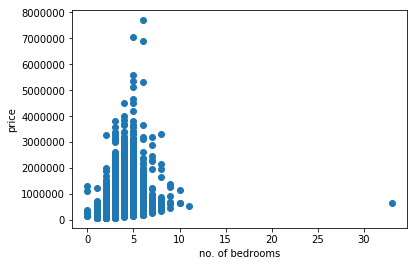

In [11]:
plt.scatter(DATA.bedrooms , DATA.price )
plt.xlabel('no. of bedrooms')
plt.ylabel('price')

In [12]:
## There is no increasing or decresing trend against price.But then there seems to be a trend for each no. of 
## bedrooms itself, may be based on location. So, this feature alone might not be a good indicator of price.
## This feature in combination with some other feature could be a good indicator of price.

Text(0, 0.5, 'price')

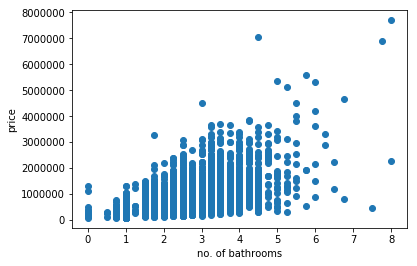

In [13]:
plt.scatter(DATA.bathrooms , DATA.price )
plt.xlabel('no. of bathrooms')
plt.ylabel('price')

In [14]:
## The distribution seems to be very similiar to 'bedrooms' column.
## This feature directly cannot be a good indicator of price.

Text(0, 0.5, 'price')

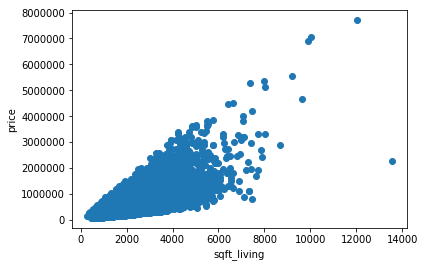

In [15]:
plt.scatter(DATA.sqft_living , DATA.price )
plt.xlabel('sqft_living')
plt.ylabel('price')

In [16]:
# Despite having a linear trend, price has different values for a particular sqft living.
# This feature might be a good predictor in combination with another feature that is causing the heterskedasticity

Text(0, 0.5, 'price')

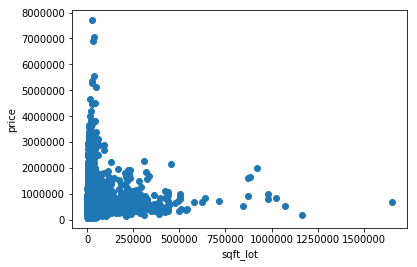

In [17]:
plt.scatter(DATA.sqft_lot , DATA.price )
plt.xlabel('sqft_lot')
plt.ylabel('price')

In [18]:
# Again the price varies for a single lot data point
# This feature might be a good predictor in combination with another feature

Text(0, 0.5, 'price')

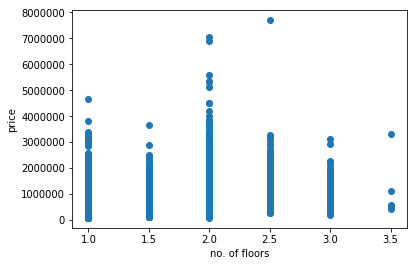

In [19]:
plt.scatter(DATA.floors , DATA.price )
plt.xlabel('no. of floors')
plt.ylabel('price')

In [20]:
# There is a range of price values for each data point
# No trend and no direct connection with price

Text(0, 0.5, 'price')

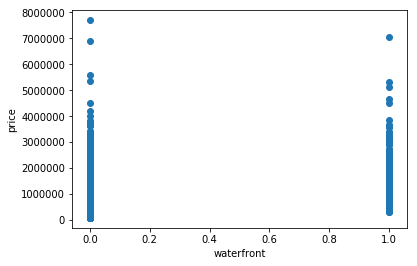

In [21]:
plt.scatter(DATA.waterfront , DATA.price )
plt.xlabel('waterfront')
plt.ylabel('price')

In [22]:
# There is a range of price values for each data point
# No trend and no direct connection with price
# Could be a good predictor in combination with another feature

Text(0, 0.5, 'price')

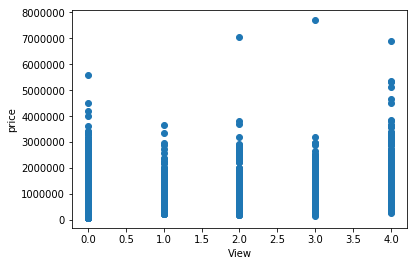

In [23]:
plt.scatter(DATA.view , DATA.price )
plt.xlabel('View')
plt.ylabel('price')

Text(0, 0.5, 'price')

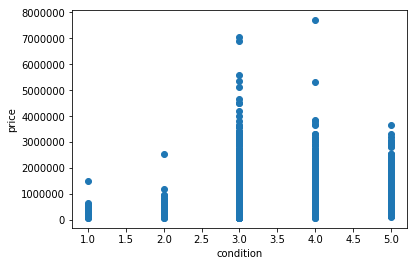

In [24]:
plt.scatter(DATA.condition , DATA.price )
plt.xlabel('condition')
plt.ylabel('price')

Text(0, 0.5, 'price')

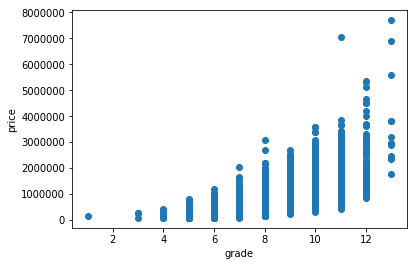

In [25]:
plt.scatter(DATA.grade , DATA.price )
plt.xlabel('grade')
plt.ylabel('price')

Text(0, 0.5, 'price')

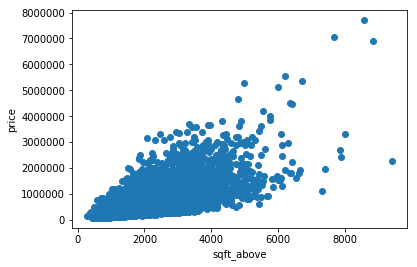

In [26]:
plt.scatter(DATA.sqft_above , DATA.price )
plt.xlabel('sqft_above')
plt.ylabel('price')

Text(0, 0.5, 'price')

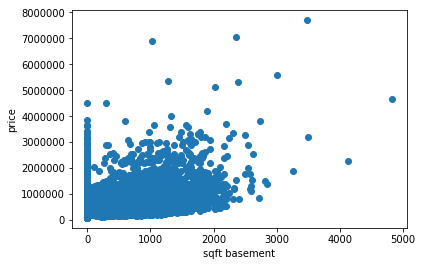

In [27]:
plt.scatter(DATA.sqft_basement , DATA.price )
plt.xlabel('sqft basement')
plt.ylabel('price')

Text(0, 0.5, 'price')

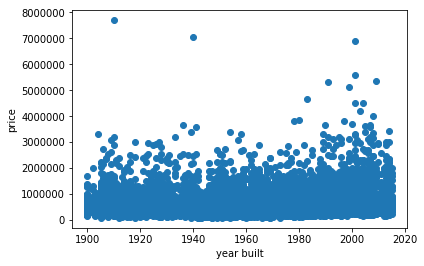

In [28]:
plt.scatter(DATA.yr_built , DATA.price )
plt.xlabel('year built')
plt.ylabel('price')

Text(0, 0.5, 'price')

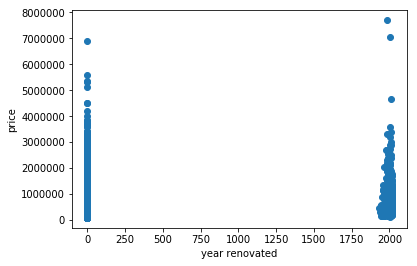

In [29]:
plt.scatter(DATA.yr_renovated , DATA.price )
plt.xlabel('year renovated')
plt.ylabel('price')

Text(0, 0.5, 'price')

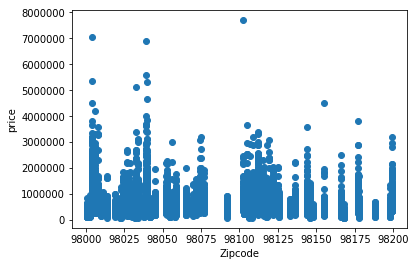

In [30]:
plt.scatter(DATA.zipcode , DATA.price )
plt.xlabel('Zipcode')
plt.ylabel('price')

Text(0, 0.5, 'price')

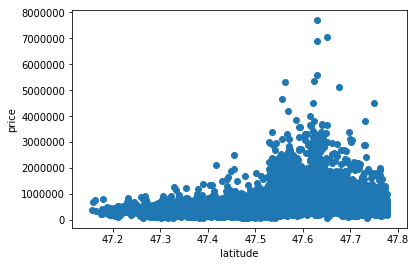

In [31]:
plt.scatter(DATA.lat , DATA.price )
plt.xlabel('latitude')
plt.ylabel('price')

Text(0, 0.5, 'price')

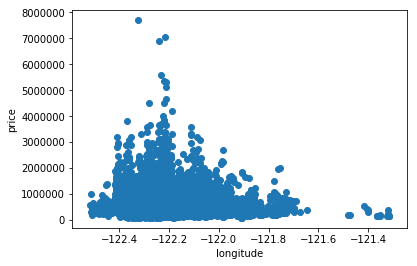

In [32]:
plt.scatter(DATA.long , DATA.price )
plt.xlabel('longitude')
plt.ylabel('price')

Text(0, 0.5, 'price')

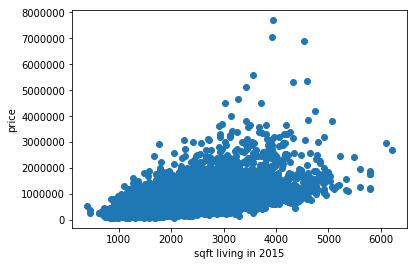

In [33]:
plt.scatter(DATA.sqft_living15 , DATA.price )
plt.xlabel('sqft living in 2015')
plt.ylabel('price')

Text(0, 0.5, 'price')

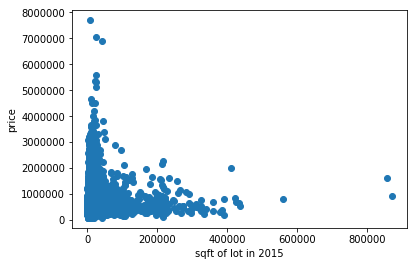

In [34]:
plt.scatter(DATA.sqft_lot15 , DATA.price )
plt.xlabel('sqft of lot in 2015')
plt.ylabel('price')

In [36]:
# None of the input features have a linear trend with the target variable.
# They would give better results in combination with another feature

In [37]:
x = DATA.drop("price", axis = 1)
y = DATA["price"]

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [40]:
basic_model = LinearRegression()
basic_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [41]:
# Train R^2
print(basic_model.score(x_train, y_train))

0.7039204877752208


In [42]:
# Test R^2
print(basic_model.score(x_test, y_test))

0.6904794689323371


In [43]:
# Train MSE
predictedPrice = basic_model.predict(x_train)
print(mean_squared_error(predictedPrice, y_train))

37196700110.46794


In [44]:
# Test MSE
predictedPrice = basic_model.predict(x_test)
print(mean_squared_error(predictedPrice, y_test))

48306968434.356606


##### Feature Selection

In [46]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [52]:
sfs1 = sfs(basic_model, k_features=10, forward=True, scoring='r2', cv=10)

In [53]:
sfs1 = sfs1.fit(x_train.values, y_train.values)

In [54]:
sfs1.get_metric_dict()

{1: {'feature_idx': (2,),
  'cv_scores': array([0.48659413, 0.47695156, 0.46070885, 0.4883653 , 0.42969341,
         0.4878821 , 0.53140906, 0.49847529, 0.51157807, 0.48149592]),
  'avg_score': 0.4853153699290552,
  'feature_names': ('2',),
  'ci_bound': 0.019351758046056485,
  'std_dev': 0.026055501023633246,
  'std_err': 0.008685167007877748},
 2: {'feature_idx': (2, 14),
  'cv_scores': array([0.57473733, 0.57468606, 0.55182397, 0.55944966, 0.53538011,
         0.58472847, 0.60088623, 0.56649024, 0.5744079 , 0.55007764]),
  'avg_score': 0.5672667605253814,
  'feature_names': ('2', '14'),
  'ci_bound': 0.013305647672821943,
  'std_dev': 0.017914926165065567,
  'std_err': 0.005971642055021855},
 3: {'feature_idx': (2, 6, 14),
  'cv_scores': array([0.61256021, 0.6308823 , 0.60482663, 0.60965755, 0.59534105,
         0.60967973, 0.62875204, 0.60851058, 0.59965469, 0.60505126]),
  'avg_score': 0.6104916034791465,
  'feature_names': ('2', '6', '14'),
  'ci_bound': 0.008024907927721,
  'std

In [50]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

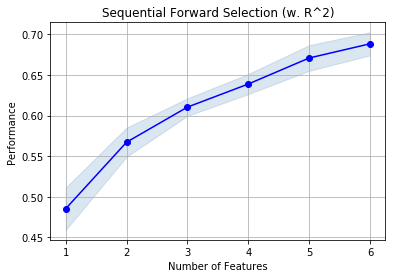

In [51]:
fig = plot_sfs(sfs1.get_metric_dict())

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [88]:
# Which features?
columnList = list(x_train.columns)
feat_cols = (0, 2, 5, 6, 8, 11, 14)
print(feat_cols)

(0, 2, 5, 6, 8, 11, 14)


In [89]:
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

['bedrooms', 'sqft_living', 'waterfront', 'view', 'grade', 'yr_built', 'lat']


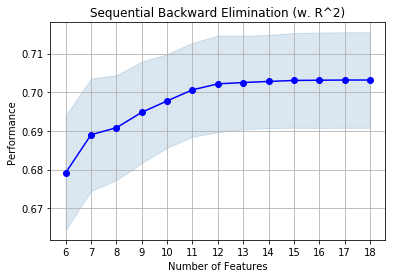

In [58]:
sfs2 = sfs(basic_model, k_features=6, forward=False, scoring='r2', cv=10)
sfs2 = sfs2.fit(x_train.values, y_train.values)

fig = plot_sfs(sfs2.get_metric_dict())

plt.title('Sequential Backward Elimination (w. R^2)')
plt.grid()
plt.show()

In [62]:
sfs2.get_metric_dict()

{18: {'feature_idx': (0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17),
  'cv_scores': array([0.71906291, 0.71645702, 0.69212113, 0.68726021, 0.71174291,
         0.70382267, 0.71776482, 0.68262306, 0.70025894, 0.70048043]),
  'avg_score': 0.7031594105860668,
  'feature_names': ('0',
   '1',
   '2',
   '3',
   '4',
   '5',
   '6',
   '7',
   '8',
   '9',
   '10',
   '11',
   '12',
   '13',
   '14',
   '15',
   '16',
   '17'),
  'ci_bound': 0.009184274395331087,
  'std_dev': 0.012365846572665403,
  'std_err': 0.004121948857555134},
 17: {'feature_idx': (0,
   1,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17),
  'cv_scores': array([0.71906291, 0.71645702, 0.69212113, 0.68726021, 0.71174291,
         0.70382267, 0.71776482, 0.68262306, 0.70025894, 0.70048043]),
  'avg_score': 0.703159410586079,
  'feature_names': ('0',
   '1',
   '3',
   '4',
   '5',
   '6',
   '7',
   '8',
 

In [84]:
# 7 features seems to be an optimal number
feat_cols1 = (5, 6, 8, 9, 10, 11, 14)
subsetColumnList = [columnList[i] for i in feat_cols1] 
print(subsetColumnList)

['waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'lat']


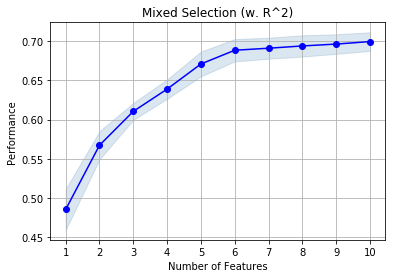

In [68]:
sfs3 = sfs(basic_model, k_features=17, forward=True, scoring='r2', cv=10, floating = True)
sfs3 = sfs1.fit(x_train.values, y_train.values)
#sfs3.get_metric_dict()
fig = plot_sfs(sfs3.get_metric_dict())

plt.title('Mixed Selection (w. R^2)')
plt.grid()
plt.show()

In [69]:
sfs3.get_metric_dict()

{1: {'feature_idx': (2,),
  'cv_scores': array([0.48659413, 0.47695156, 0.46070885, 0.4883653 , 0.42969341,
         0.4878821 , 0.53140906, 0.49847529, 0.51157807, 0.48149592]),
  'avg_score': 0.4853153699290552,
  'feature_names': ('2',),
  'ci_bound': 0.019351758046056485,
  'std_dev': 0.026055501023633246,
  'std_err': 0.008685167007877748},
 2: {'feature_idx': (2, 14),
  'cv_scores': array([0.57473733, 0.57468606, 0.55182397, 0.55944966, 0.53538011,
         0.58472847, 0.60088623, 0.56649024, 0.5744079 , 0.55007764]),
  'avg_score': 0.5672667605253814,
  'feature_names': ('2', '14'),
  'ci_bound': 0.013305647672821943,
  'std_dev': 0.017914926165065567,
  'std_err': 0.005971642055021855},
 3: {'feature_idx': (2, 6, 14),
  'cv_scores': array([0.61256021, 0.6308823 , 0.60482663, 0.60965755, 0.59534105,
         0.60967973, 0.62875204, 0.60851058, 0.59965469, 0.60505126]),
  'avg_score': 0.6104916034791465,
  'feature_names': ('2', '6', '14'),
  'ci_bound': 0.008024907927721,
  'std

In [83]:
# 6 or 7 features seems to be optimal
feat_cols2 = (0, 2, 5, 6, 8, 11, 14)
subsetColumnList = [columnList[i] for i in feat_cols2] 
print(subsetColumnList)

['bedrooms', 'sqft_living', 'waterfront', 'view', 'grade', 'yr_built', 'lat']


In [71]:
# All three feature selection methods have given me the same set features for the k_features=7
# I am going to go with those features

#### Hyper Parameters Tuning

In [72]:
from sklearn.model_selection import GridSearchCV

In [90]:
x_train.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [91]:
# Remove the lower order features
x_train = x_train.drop(labels=['bathrooms', 'sqft_lot', 'floors','condition','sqft_above','sqft_basement', 'yr_renovated', 'zipcode', 'long','sqft_living15', 'sqft_lot15'], axis=1)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15129 entries, 2060 to 235
Data columns (total 7 columns):
bedrooms       15129 non-null int64
sqft_living    15129 non-null int64
waterfront     15129 non-null int64
view           15129 non-null int64
grade          15129 non-null int64
yr_built       15129 non-null int64
lat            15129 non-null float64
dtypes: float64(1), int64(6)
memory usage: 945.6 KB


In [92]:
# Remove the lower order features
x_test = x_test.drop(labels=['bathrooms', 'sqft_lot', 'floors','condition','sqft_above','sqft_basement', 'yr_renovated', 'zipcode', 'long','sqft_living15', 'sqft_lot15'], axis=1)
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6484 entries, 15544 to 18802
Data columns (total 7 columns):
bedrooms       6484 non-null int64
sqft_living    6484 non-null int64
waterfront     6484 non-null int64
view           6484 non-null int64
grade          6484 non-null int64
yr_built       6484 non-null int64
lat            6484 non-null float64
dtypes: float64(1), int64(6)
memory usage: 405.2 KB


In [73]:
# Using Decision tree
from sklearn.tree import DecisionTreeRegressor

In [93]:
model= DecisionTreeRegressor(random_state=1234)
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[123]}
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
model1.fit(x_train,y_train)
print("Best Hyper Parameters:",model1.best_params_)

C:\Users\vaishnavik\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best Hyper Parameters: {'max_features': 'sqrt', 'min_samples_leaf': 7, 'min_samples_split': 2, 'random_state': 123}


In [94]:
prediction=model1.predict(x_test)
from sklearn import metrics

In [95]:
from sklearn.metrics import mean_squared_error, r2_score
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, prediction))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, prediction))

Mean squared error: 43810586794.13
Test Variance score: 0.72


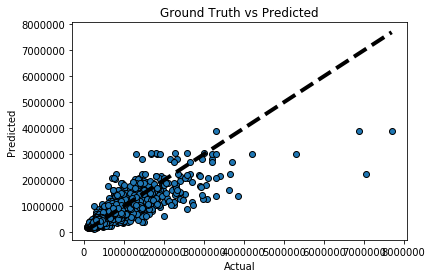

In [96]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test, prediction, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

In [97]:
#Linear Regression
model2 = LinearRegression()
model2.fit(x_train, y_train)
model2.score(x_train, y_train)

0.6911735389476331

In [98]:
model2.score(x_test, y_test)

0.6777941518391565

In [ ]:
# Not much difference in scoring after reducing the dimensions